## <font face = 'Times New Roma' size = 5>1. Define The Problem

<font face = 'Times New Roma' size = 4>This competition is about predicting whether a customer will change telecommunications provider, something known as "churning".
    
<font face = 'Times New Roma' size = 4>The training dataset contains 4250 samples. Each sample contains 19 features and 1 boolean variable "churn" which indicates the class of the sample.

## <font face = 'Times New Roma' size = 5>2. Prepare Data for Consumption

### <font face = 'Times New Roma' size = 5>2.1. Import Fundamental Libraries

In [1]:
import pandas as pd
import matplotlib as mlt
import numpy as np
import scipy as sp
import sklearn
import warnings
warnings.filterwarnings('ignore')

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

# initial settings
%matplotlib inline
mpl.style.use('ggplot')
plt.rcParams["font.family"]="Times New Roman"
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

### <font face = 'Times New Roma' size = 5>2.2. Load Data Modelling Libraries

In [2]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

### <font face = 'Times New Roma' size = 5>2.3. Meet and Greet Data

In [3]:
data_raw = pd.read_csv('./train.csv')
data_val = pd.read_csv('./test.csv')

data1 = data_raw.copy(deep = True)
data_cleaner = [data1, data_val]

print(data_raw.info())
data_raw.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


## <font face = 'Times New Roma' size = 5>3. Data Cleaning

### <font face = 'Times New Roma' size = 5>3.1. Correcting And Completing

In [4]:
print(data1.isnull().sum(), data1.shape)
print('\n')
print(data_val.isnull().sum(), data_val.shape)

data_raw.describe()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64 (4250, 20)


id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes            

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### <font face = 'Times New Roma' size = 5>3.2. Creating And Converting

In [5]:
for dataset in data_cleaner:
    dataset['account_length_bin'] = pd.qcut(dataset['account_length'], 4)
    
    dataset['international_plan'] = dataset['international_plan'].map(dict(yes=1, no=0))
    
    dataset['new_number_vmail_messages'] = dataset['number_vmail_messages']
    dataset['new_number_vmail_messages'].loc[dataset['voice_mail_plan'] == 'no'] = -1
    dataset['voice_mail_bin'] = pd.cut(dataset['new_number_vmail_messages'], bins=(-2, -1, 0, 16, 52))
    
    dataset['voice_mail_plan'] = dataset['voice_mail_plan'].map(dict(yes=1, no=0))
    
    dataset['total_minutes'] = dataset['total_day_minutes'] + dataset['total_eve_minutes'] + dataset['total_night_minutes']
    dataset['total_calls'] = dataset['total_day_calls'] + dataset['total_eve_calls'] + dataset['total_night_calls']
    dataset['total_charge'] = dataset['total_day_charge'] + dataset['total_eve_charge'] + dataset['total_night_charge']
    
    dataset.drop(columns = ['state', 'total_day_charge', 'total_eve_charge','total_night_charge',
                            'total_day_calls','total_eve_calls', 'total_night_calls', 'total_day_minutes', 
                            'total_eve_minutes', 'total_night_minutes', 'number_vmail_messages', 
                            'account_length', 'new_number_vmail_messages'], inplace=True)
    
    label = LabelEncoder()
    cate_cols = ['account_length_bin', 'voice_mail_bin', 'area_code']
    for col in cate_cols:
        dataset[col] = label.fit_transform(dataset[col])

data1['churn'] = data1['churn'].map(dict(yes=1, no=0))
data1

,area_code,international_plan,voice_mail_plan,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,account_length_bin,voice_mail_bin,total_minutes,total_calls,total_charge
0,1,0,1,13.7,3,3.70,1,0,2,3,611.5,329,55.54
1,1,0,0,12.2,5,3.29,0,0,3,0,527.2,328,59.00
2,0,1,0,6.6,7,1.78,2,0,1,0,558.2,248,65.02
3,1,1,0,10.1,3,2.73,3,0,1,0,501.9,356,49.36
4,2,0,1,7.5,7,2.03,3,0,2,3,779.3,314,76.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,1,0,0,10.3,6,2.78,0,0,1,0,645.8,237,62.35
4246,0,0,0,11.5,6,3.11,3,0,0,0,495.3,260,49.77
4247,0,0,0,6.9,7,1.86,1,0,1,0,492.9,331,51.24
4248,0,0,1,9.9,5,2.67,2,0,0,3,756.2,369,72.42


In [6]:
data1_x = ['international_plan', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'area_code',
     'number_customer_service_calls', 'account_length_bin', 'voice_mail_bin', 'total_minutes', 'total_calls',
     'total_charge']
y = ['churn']

### <font face = 'Times New Roma' size = 5>3.3. Split Training and Testing Data

In [7]:
# 训练集与测试集
train_x, test_x, train_y, test_y = model_selection.train_test_split(data1[data1_x], data1[y], random_state = 0)

## <font face = 'Times New Roma' size = 5>4. Perform Exploratory Analysis with Statistics

In [8]:
# 不同类别流失水平
data1_cate = ['account_length_bin', 'area_code', 'international_plan', 'voice_mail_plan',
              'voice_mail_bin', 'number_customer_service_calls']
for x in data1_cate:
    print(data1[[x, y[0]]].groupby(x, as_index=False).mean())
    print('-'*40, '\n')

   account_length_bin     churn
0                   0  0.127778
1                   1  0.143251
2                   2  0.158548
3                   3  0.133462
---------------------------------------- 

   area_code     churn
0          0  0.139963
1          1  0.136148
2          2  0.150568
---------------------------------------- 

   international_plan     churn
0                   0  0.111832
1                   1  0.421717
---------------------------------------- 

   voice_mail_plan     churn
0                0  0.164436
1                1  0.073741
---------------------------------------- 

   voice_mail_bin     churn
0               0  0.164436
1               1  0.000000
2               2  0.034483
3               3  0.075973
---------------------------------------- 

   number_customer_service_calls     churn
0                              0  0.109481
1                              1  0.108924
2                              2  0.107709
3                              3  0.11

<AxesSubplot:xlabel='number_customer_service_calls', ylabel='churn'>

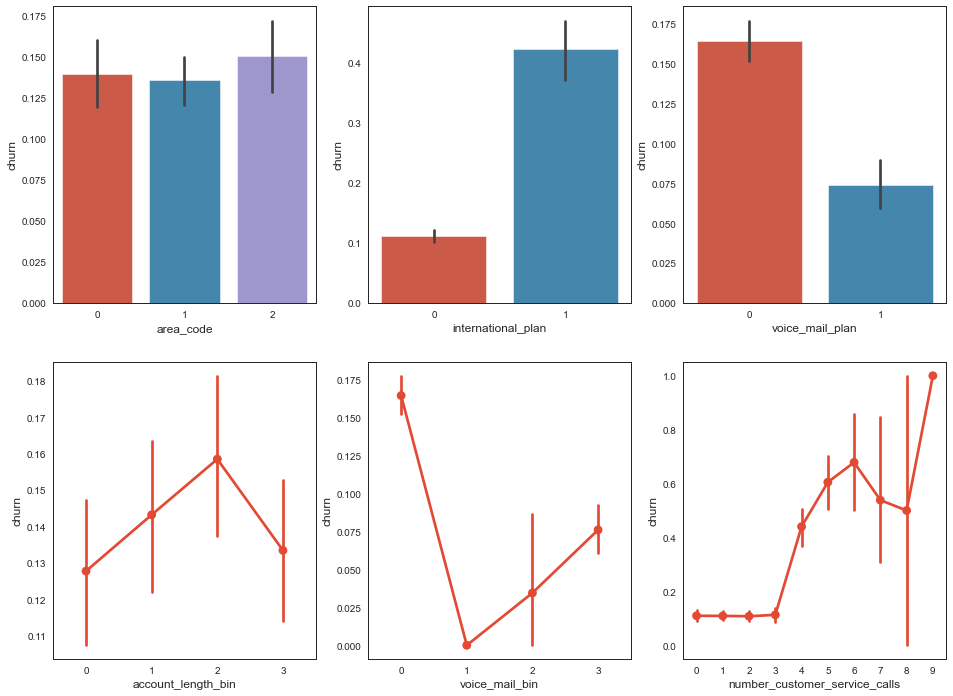

In [9]:
fig, ax = plt.subplots(2, 3,figsize=(16,12))

sns.barplot(x = 'area_code', y = 'churn', data=data1, ax=ax[0,0])
sns.barplot(x = 'international_plan', y = 'churn', data=data1, ax=ax[0,1])
sns.barplot(x = 'voice_mail_plan', y = 'churn', data=data1, ax=ax[0,2])

sns.pointplot(x = 'account_length_bin', y = 'churn',  data=data1, ax=ax[1,0])
sns.pointplot(x = 'voice_mail_bin', y = 'churn',  data=data1, ax=ax[1,1])
sns.pointplot(x = 'number_customer_service_calls', y = 'churn', data=data1, ax=ax[1,2])

<AxesSubplot:xlabel='churn', ylabel='total_intl_minutes'>

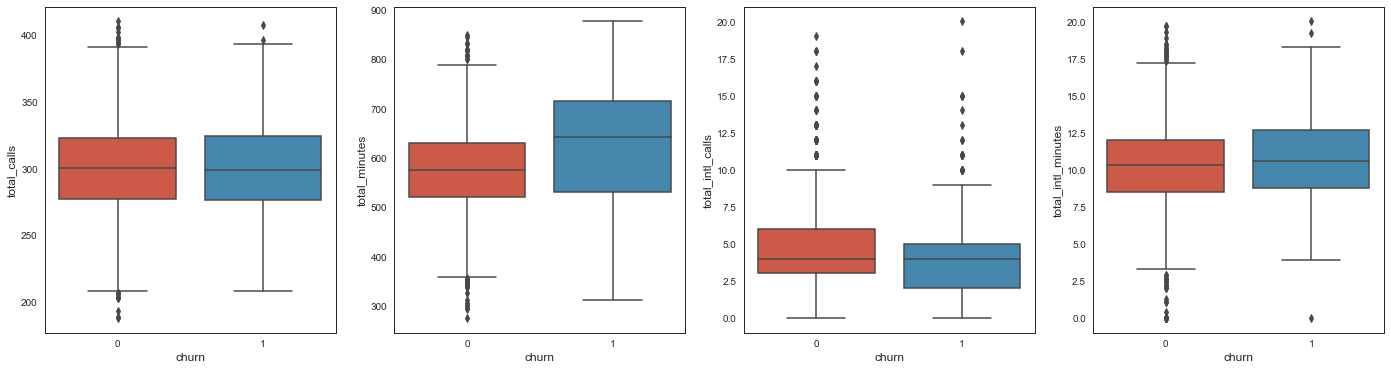

In [10]:
fig, ax = plt.subplots(1, 4, figsize=(24, 6))
sns.boxplot(x='churn', y='total_calls',  data=data1, ax=ax[0])
sns.boxplot(x='churn', y='total_minutes', data=data1, ax=ax[1])
sns.boxplot(x='churn', y='total_intl_calls', data=data1, ax=ax[2])
sns.boxplot(x='churn', y='total_intl_minutes', data=data1, ax=ax[3])

<AxesSubplot:xlabel='international_plan', ylabel='total_intl_minutes'>

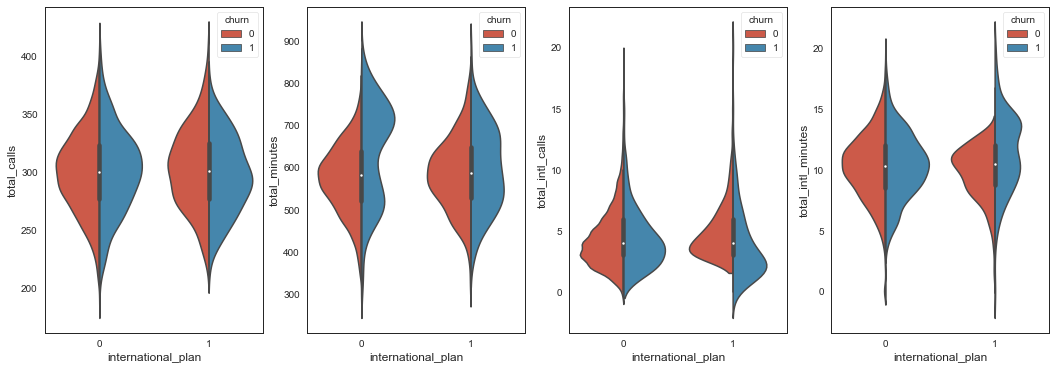

In [11]:
fig, ax = plt.subplots(1, 4, figsize=(18, 6))

sns.violinplot(x='international_plan', y='total_calls', hue='churn', data=data1, split = True, ax=ax[0])
sns.violinplot(x='international_plan', y='total_intl_calls', hue='churn', data=data1, split = True, ax=ax[2])

sns.violinplot(x='international_plan', y='total_minutes', hue='churn', data=data1, split = True, ax=ax[1])
sns.violinplot(x='international_plan', y='total_intl_minutes', hue='churn', data=data1, split = True, ax=ax[3])

## <font face = 'Times New Roma' size = 5>5. Model Data

In [12]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True, nu=0.25),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    #xgboost
    XGBClassifier(eval_metric='error')
    ]

In [13]:
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 )

MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

MLA_predict = data1[y]

row_index = 0
for alg in MLA:

    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    cv_results = model_selection.cross_validate(alg, data1[data1_x], data1[y], cv=cv_split, return_train_score=True)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean() 
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3
    
    alg.fit(data1[data1_x], data1[y])
    MLA_predict[MLA_name] = alg.predict(data1[data1_x])
    
    row_index+=1

MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
21,XGBClassifier,"{'objective': 'binary:logistic', 'use_label_en...",1.0,0.972392,0.012262,0.295033
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.999922,0.972,0.013312,0.349907
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.983137,0.969569,0.010824,0.449146
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.993961,0.96949,0.013077,0.118785
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",1.0,0.957255,0.02022,0.328868
17,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",1.0,0.944706,0.020193,0.041548
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.929412,0.915843,0.033624,0.159694
15,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.90749,0.903216,0.046564,0.940123
18,ExtraTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",1.0,0.878588,0.032327,0.013365
20,QuadraticDiscriminantAnalysis,"{'priors': None, 'reg_param': 0.0, 'store_cova...",0.869961,0.868941,0.027206,0.004472


## <font face = 'Times New Roma' size = 5>6. Submission

In [18]:
gbc = ensemble.GradientBoostingClassifier()
gbc.fit(data1[data1_x], data1[y])
pre = gbc.predict(data_val[data1_x])
print(pre[:5])
ans = pd.read_csv('./sampleSubmission.csv')
ans.churn = pre
ans.churn= ans.churn.map({ 1: 'yes', 0 : 'no'}) 
ans.to_csv('Submission_gbc.csv', index=False)
ans.head()

[0 0 0 0 0]


,id,churn
0,1,no
1,2,no
2,3,no
3,4,no
4,5,no


In [16]:
rfc = ensemble.RandomForestClassifier()
rfc.fit(data1[data1_x], data1[y])
pre = rfc.predict(data_val[data1_x])
print(pre[:5])
ans = pd.read_csv('./sampleSubmission.csv')
ans.churn = pre
ans.churn= ans.churn.map({ 1: 'yes', 0 : 'no'}) 
ans.to_csv('Submission_rfc.csv', index=False)
ans.head()

[0 0 0 0 0]


,id,churn
0,1,no
1,2,no
2,3,no
3,4,no
4,5,no


In [17]:
xgb = XGBClassifier(eval_metric='error')
xgb.fit(data1[data1_x], data1[y])
pre = xgb.predict(data_val[data1_x])
print(pre[:5])
ans = pd.read_csv('./sampleSubmission.csv')
ans.churn = pre
ans.churn= ans.churn.map({ 1: 'yes', 0 : 'no'}) 
ans.to_csv('Submission_xgb.csv', index=False)
ans.head()

[0 0 0 0 0]


,id,churn
0,1,no
1,2,no
2,3,no
3,4,no
4,5,no
